In [1]:
import numpy as np
from FlagRep import FlagRep
from matplotlib import pyplot as plt

from FlagRepp import FlagRepp

In [2]:
n = 2
p = 4

hidden_flag_type = [1,2]

hidden_ms = [1,1]
col_ids = [2,2]

np.random.seed(42)


D = []
for i in range(len(hidden_flag_type)):
    # Set dimensions
    rows = n
    cols = col_ids[i]

    # Generate a random matrix of rank < cols
    # First, create a matrix of lower rank (rank < cols)
    rank = hidden_ms[i] # Specify the desired rank
    low_rank_matrix = np.random.randn(rows, rank)

    if i > 0:
        # Multiply by another random matrix to get the final matrix with more columns
        random_matrix = (np.eye(n) - random_matrix @np.linalg.pinv(random_matrix.T @ random_matrix) @ random_matrix.T) @ low_rank_matrix @ np.random.randn(rank, cols)
    else:
        random_matrix =  low_rank_matrix @ np.random.randn(rank, cols)

    # Verify the rank of the matrix
    rank_of_matrix = np.linalg.matrix_rank(random_matrix)
    print(f'matrix rank is {rank_of_matrix}')

    D.append(random_matrix)

D = np.hstack(D)
print(D.shape)
print(f'total shape is {D.shape}, total rank is {np.linalg.matrix_rank(D)}')


matrix rank is 1
matrix rank is 1
(2, 4)
total shape is (2, 4), total rank is 2


In [3]:
Aset = [np.arange(c) for c in np.cumsum(col_ids)]
fl_type = np.cumsum(hidden_ms)

In [4]:
len(fl_type)

2

In [5]:
fr0 = FlagRep(Aset = Aset, flag_type=fl_type)
Q0,R0 = fr0.fit_transform(D)

In [6]:
fr1 = FlagRepp(Aset = Aset, flag_type=fl_type, solver = 'qr')
Q1,R1 = fr1.fit_transform(D)

warning! QR doesnt support input flag type
[[-7.85272136e-01 -3.33947335e-01]
 [ 0.00000000e+00  1.52488543e-17]]
[[-0.78527214 -0.33394734]]
warning! QR doesnt support input flag type
[[4.55370066e-01 2.21291773e-01]
 [0.00000000e+00 2.93890045e-17]]
[[0.45537007 0.22129177]]
(1, 2)
(1, 2)
(1, 2)
(1, 2)


In [7]:
Q0[:,1].T @ Q1[:,1]

np.float64(1.0000000000000002)

In [8]:
R0

array([[-3.33947335e-01, -7.85272136e-01,  8.32667268e-17,
         4.16333634e-17],
       [ 0.00000000e+00,  0.00000000e+00,  4.55370066e-01,
         2.21291773e-01]])

In [9]:
np.linalg.trace(Q0.T @ Q1 @ Q1.T @ Q0)

np.float64(2.000000000000001)

In [ ]:
np.linalg.norm(Q0 @ R0 - D), np.linalg.norm(Q1 @ R1 - D)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 2)

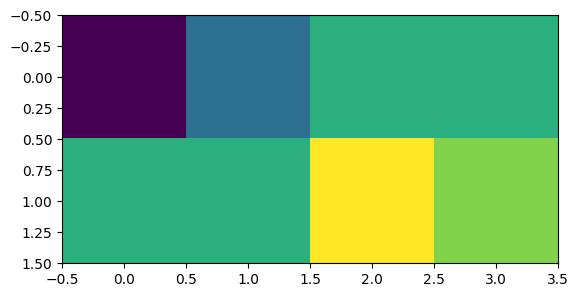

In [12]:
plt.imshow(R1)

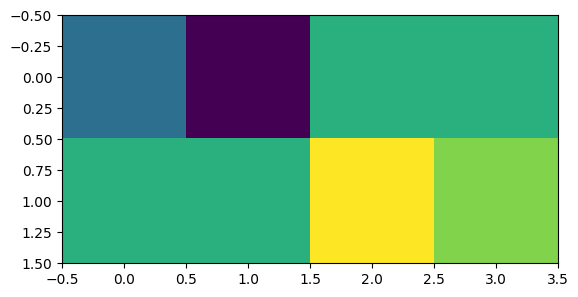

In [13]:
plt.imshow(R0)

In [ ]:
from torchvision.models import alexnet
alexnet()

In [ ]:
import pandas as pd
data0 = pd.read_csv('../results/eurosat_probing.csv')

In [ ]:
import seaborn as sns
sns.boxplot(data0, hue = 'Method', x = 'N Shots', y = 'Accuracy')

In [ ]:
import pandas as pd
data0 = pd.read_csv('../results/cifar10_probing.csv')

data1 = pd.read_csv('../results/cifar10_probing1.csv')

In [ ]:
idx0 = (data0['Method'] == 'FlagNets') & (data0['N Shots'] == 7)
data0[idx0]['Accuracy'].mean()

In [ ]:
idx1 = (data1['Method'] == 'FlagNets') & (data1['N Shots'] == 7)
data1[idx1]['Accuracy'].mean()

In [ ]:
from torchvision.models import alexnet
from torch import nn
from PrototypicalNetworks import PrototypicalNetworks

backbone = alexnet(pretrained = True)
backbone.classifier[6] = nn.Flatten()
for param in backbone.features.parameters():
    param.requires_grad = False

print(backbone)

model = PrototypicalNetworks(backbone, head = 'ProtoNet')

print(model)

In [ ]:
for param in backbone.features.parameters():
    print(param.requires_grad)

In [ ]:
for param in backbone.classifier.parameters():
    print(param.requires_grad)

In [ ]:
#### NETWORK HEAD CHECK!

import torch
from PrototypicalFlagNetworks import PrototypicalFlagNetworks
from AlexNetLastTwoLayers import AlexNetLastTwoLayers
from torchvision.models import alexnet
from NetworkHeads import FlagNetHead, SubspaceNetHead

n_shot = 3
n_way = 2

ss2_0 = torch.rand((100))
ss2_0 = ss2_0/torch.linalg.norm(ss2_0)

ss1_0 = (torch.eye(100)-ss2_0.outer(ss2_0)).mm(torch.rand((100,1)))
ss1_0 = ss1_0/torch.linalg.norm(ss1_0)
ss1_0 = ss1_0.squeeze(-1)

ss2_1 = torch.rand((100))
ss2_1 = ss2_1/torch.linalg.norm(ss2_1)

ss1_1 = (torch.eye(100)-ss2_1.outer(ss2_1)).mm(torch.rand((100,1)))
ss1_1 = ss1_1/torch.linalg.norm(ss1_1)
ss1_1 = ss1_1.squeeze(-1)

query1 = torch.rand((7,100)).mm((ss1_0).outer(ss1_0))
query2 = torch.rand((7,100)).mm((ss2_0).outer(ss2_0))

support1 = torch.vstack([torch.rand((3,100)).mm(ss1_0.outer(ss1_0)),torch.rand((3,100)).mm(ss1_1.outer(ss1_1))])
support2 = torch.vstack([torch.rand((3,100)).mm(ss2_0.outer(ss2_0)),torch.rand((3,100)).mm(ss2_1.outer(ss2_1))])

support_labels = torch.tensor([0]*n_shot+[1]*n_shot)




SubspaceNetHead(query1, support1, support_labels, n_way, n_shot)


FlagNetHead(query1, query2, support1, support2, support_labels, n_way, n_shot)


In [ ]:
n = 4956
p = 13

hidden_flag_type = [2,4]

hidden_ms = [2,2]
col_ids = [3,10]

np.random.seed(42)


D = []
for i in range(len(hidden_flag_type)):
    # Set dimensions
    rows = n
    cols = col_ids[i]

    # Generate a random matrix of rank < cols
    # First, create a matrix of lower rank (rank < cols)
    rank = hidden_ms[i] # Specify the desired rank
    low_rank_matrix = np.random.randn(rows, rank)

    if i > 0:
        # Multiply by another random matrix to get the final matrix with more columns
        random_matrix = (np.eye(n) - random_matrix @np.linalg.pinv(random_matrix.T @ random_matrix) @ random_matrix.T) @ low_rank_matrix @ np.random.randn(rank, cols)
    else:
        random_matrix =  low_rank_matrix @ np.random.randn(rank, cols)

    # Verify the rank of the matrix
    rank_of_matrix = np.linalg.matrix_rank(random_matrix)
    print(f'matrix rank is {rank_of_matrix}')

    D.append(random_matrix)

D = np.hstack(D)
print(D.shape)
print(f'total shape is {D.shape}, total rank is {np.linalg.matrix_rank(D)}')

In [ ]:
As = [np.arange(2), np.arange(p)]

my_flag_rep = FlagRep(Aset = As, solver = 'svd',flag_type = [2,4])

In [ ]:
np.linalg.svd(D)

In [ ]:
my_flag_rep.fit_transform(D)

In [ ]:
import pandas as pd
import seaborn as sns

results = pd.read_csv('../results/mnist_fewshot_idea.csv', index_col = 0)
sns.boxplot(data = results, x = 'Number Shots', y = 'Accuracy', hue = 'Method')
results

In [ ]:
def my_svd(C: np.array, eps_rank: float = 1, zero_tol: float = 1e-8, n_vecs: int = 0) -> np.array:
    U,S,Vh = np.linalg.svd(C, full_matrices=True)

    if n_vecs > 0:
        U = U[:,:n_vecs]
        S = S[:n_vecs]
        Vh = Vh[:n_vecs]

    else:
        nnz_ids = ~np.isclose(S, 0, atol=zero_tol)
        U = U[:,:len(S)][:,nnz_ids]
        S = S[nnz_ids]
        Vh = Vh[nnz_ids,:]

        s_prop = np.cumsum(S**2)/np.sum(S**2)
        good_idx = s_prop<=eps_rank
        U = U[:,good_idx]
        S = S[good_idx]
        Vh = Vh[good_idx,:]

    return U, S, Vh

In [ ]:
n = 10
p = 13

hidden_flag_type = [2,4]

hidden_ms = [2,2]
col_ids = [3,10]

np.random.seed(42)


D = []
for i in range(len(hidden_flag_type)):
    # Set dimensions
    rows = n
    cols = col_ids[i]

    # Generate a random matrix of rank < cols
    # First, create a matrix of lower rank (rank < cols)
    rank = hidden_ms[i] # Specify the desired rank
    low_rank_matrix = np.random.randn(rows, rank)

    if i > 0:
        # Multiply by another random matrix to get the final matrix with more columns
        random_matrix = (np.eye(n) - random_matrix @np.linalg.pinv(random_matrix.T @ random_matrix) @ random_matrix.T) @ low_rank_matrix @ np.random.randn(rank, cols)
    else:
        random_matrix =  low_rank_matrix @ np.random.randn(rank, cols)

    # Verify the rank of the matrix
    rank_of_matrix = np.linalg.matrix_rank(random_matrix)
    print(f'matrix rank is {rank_of_matrix}')

    D.append(random_matrix)

D = np.hstack(D)
print(D.shape)
print(f'total shape is {D.shape}, total rank is {np.linalg.matrix_rank(D)}')

In [ ]:
np.linalg.matrix_rank(D[:,:3])

In [ ]:
for i in range(1,p):
    print([i,p])
    As = [np.arange(i), np.arange(p)]

    my_flag_rep = FlagRep(Aset = As, solver = 'svd')
    X = my_flag_rep.fit_transform(D)
    D_out0 = my_flag_rep.inverse_transform(X)
    print(f'FlagRep err: {np.linalg.norm(D_out0-D)}')
    print(f'Flag type {my_flag_rep.flag_type()}')
    print()


    # U,S,Vh = my_svd(D)
    # D_out1 = U @ U.T @ D
    # print(f'svd err: {np.linalg.norm(D_out1-D)}')

# plt.figure()
# plt.imshow(D_out0-D_out1, cmap = 'grey')
# plt.colorbar()

my_flag_rep = FlagRep(Aset = [np.arange(p)])
X = my_flag_rep.fit_transform(D)
D_out0 = my_flag_rep.inverse_transform(X)
print(f'FlagRep err: {np.linalg.norm(D_out0-D)}')

In [ ]:
As = [np.arange(4), np.arange(p)]
my_flag_rep = FlagRep(Aset = As, solver = 'svd')
X, R = my_flag_rep.decompose(D)

my_flag_rep.flag_type()

In [ ]:
plt.imshow(X @ R- my_flag_rep.inverse_transform(X))
plt.colorbar()

In [ ]:
Q, R = np.linalg.qr(D)

plt.imshow(R)

In [ ]:
D

# Trying with HS data

In [ ]:
import scipy.io as sio

# Load the hyperspectral image and ground truth
data = sio.loadmat('../data/indian_pines/Indian_pines_corrected.mat')['indian_pines_corrected'] 
labels = sio.loadmat('../data/indian_pines/Indian_pines_gt.mat')['indian_pines_gt']  # Shape: (145, 145)


print(data.shape)

In [ ]:
def extract_patches_of_class(data, labels, patch_size, target_class):
    """
    Extract patches where all pixels in the patch are of the target class.

    :param data: The hyperspectral image data (145x145x220).
    :param labels: The ground truth labels (145x145).
    :param patch_size: Size of the patch (e.g., 7 for 7x7 patches).
    :param target_class: The class for which patches should be extracted.
    :return: A list of patches (each patch is of size patch_size x patch_size x num_bands).
    """
    half_patch = patch_size // 2
    patches = []
    patch_labels = []

    # Iterate through the image, avoiding border pixels (due to patch size)
    for i in range(half_patch, data.shape[0] - half_patch):
        for j in range(half_patch, data.shape[1] - half_patch):
            if labels[i, j] == target_class:
                # Extract the patch from both the data and the labels
                label_patch = labels[i - half_patch:i + half_patch + 1, j - half_patch:j + half_patch + 1]
                
                # Check if all pixels in the label patch are of the target class
                if np.all(label_patch == target_class):
                    # Extract the corresponding data patch
                    patch = data[i - half_patch:i + half_patch + 1, j - half_patch:j + half_patch + 1, :]
                    patches.append(patch)
                    patch_labels.append(target_class)

    return np.array(patches), np.array(patch_labels)

In [ ]:
def extract_patches(data, labels, patch_size, class_ids):
    # extract patches
    mod_data = []
    mod_labels = []
    for target_class in class_ids:
        patches, patch_labels = extract_patches_of_class(data, labels, patch_size, target_class)
        if len(patches) > 0:
            flat_patches = []
            for patch in patches:
                # Your 3D array of size 11x11x200
                array_3d = patch  # Example array

                center_x, center_y = patch_size//2, patch_size//2

                # Create a list of all (x, y) coordinates and compute their Manhattan distances from the center
                coords = [(x, y) for x in range(patch_size) for y in range(patch_size)]
                distances = [(x, y, max(abs(x - center_x), abs(y - center_y))) for x, y in coords]

                # Sort coordinates by distance
                sorted_coords = sorted(distances, key=lambda item: item[2])

                # Create the 2D array by unwrapping the 3D array based on sorted coordinates
                flat_patch = np.array([array_3d[x, y, :] for x, y, _ in sorted_coords])
                flat_patches.append(flat_patch.T)

                # Create a hierarchy vector containing the Chebyshev distances in the same sorted order
                hierarchy_vector = np.array([distance for _, _, distance in sorted_coords])

                # Find the indices where the hierarchy vector changes value
                change_indices = np.where(np.diff(hierarchy_vector) != 0)[0] + 1  # Add 1 because diff reduces length by 1

            change_indices = np.hstack([change_indices,np.array(len(hierarchy_vector))])
            mod_labels +=[target_class]*len(patches)
            
            mod_data += flat_patches

            Aset = [np.arange(i) for i in change_indices]

        else:
            print(f'No patches of class id {target_class}')

    
        print(f"Extracted {len(patches)} patches where all pixels are of class {target_class}. Each patch has shape {patch_size}.")

    return mod_data, mod_labels, Aset

In [ ]:
# patch_data, patch_labels, Aset = extract_patches(data, labels, 11, np.arange(16))

# D = patch_data[0]
# D.shape
plt.figure()
plt.imshow(data[-70:,-70:,2], cmap = 'grey')

plt.figure()
plt.imshow(labels[-70:,-70:], cmap = 'grey')
plt.colorbar()

In [ ]:
np.where(labels!=0)

In [ ]:
D = np.reshape(data[:70,:70,:], (-1,200))
# D = np.reshape(data/data.max(), (-1,200))

In [ ]:
np.linalg.matrix_rank(D), D.shape, len(D)

In [ ]:
plt.imshow(D @ D.T, cmap = 'grey')
plt.colorbar()

In [ ]:
plt.imshow(D.T @ D, cmap = 'grey')
plt.colorbar()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import matplotlib.pyplot as plt

n_samples, n_features  = D.shape

# Normalize the data
X_normalized = normalize(D)

# Create a DataFrame for easier handling
df = pd.DataFrame(X_normalized, columns=[f'Feature {i+1}' for i in range(n_features)])

# Generate the correlation matrix
correlation_matrix = np.array(df.corr())

# Output the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix Heatmap')
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(ticks=np.arange(n_features), labels=df.columns, rotation=45)
plt.yticks(ticks=np.arange(n_features), labels=df.columns)
plt.show()

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import matplotlib.pyplot as plt


# Perform hierarchical clustering
Z = linkage(1-correlation_matrix, method='ward')  # You can choose other methods like 'single', 'complete', etc.

# Define the number of clusters
num_clusters = 3

# Assign cluster memberships
clusters = fcluster(Z, num_clusters, criterion='maxclust')


# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram (Cosine Distance)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()



In [ ]:
[len(np.where(clusters==i)[0]) for i in range(1,4)]

In [ ]:
Aset = [ np.where(clusters==3)[0], 
        np.concatenate((np.where(clusters==3)[0],np.where(clusters==2)[0])), 
        np.concatenate((np.where(clusters==3)[0],np.where(clusters==2)[0],np.where(clusters==1)[0]))]

In [ ]:
B = np.hstack([D[:,np.where(clusters==3)[0]],D[:,np.where(clusters==2)[0]], D[:,np.where(clusters==1)[0]]])

In [ ]:
# Normalize the data
X_normalized = normalize(B)

# Create a DataFrame for easier handling
df = pd.DataFrame(X_normalized, columns=[f'Feature {i+1}' for i in range(n_features)])

# Generate the correlation matrix
correlation_matrix = np.array(df.corr())

# Output the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix Heatmap')
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(ticks=np.arange(n_features), labels=df.columns, rotation=45)
plt.yticks(ticks=np.arange(n_features), labels=df.columns)
plt.show()

In [ ]:

my_flag_rep = FlagRep(Aset = Aset, solver = 'svd', plot_eigs = True)
X, R = my_flag_rep.decompose(D)
print(my_flag_rep.flag_type())
np.sum(np.linalg.norm(X @ R - B, axis = 1)**2)/len(B)

In [ ]:
U,S,_ = np.linalg.svd(D, full_matrices = False)
# S = S/S.max()
# s_diff = np.abs(np.diff(S))
# n_vecs = np.sum(s_diff >= 1e-3)
n_vecs = 74
U = U[:,:n_vecs]
np.sum(np.linalg.norm(U @ U.T @ D - D, axis = 1)**2)/len(D)

In [ ]:
my_flag_rep = FlagRep(Aset = Aset, solver = 'qr')
X0 = my_flag_rep.fit_transform(D)

In [ ]:
plt.imshow(X0.T @ X0, cmap = 'grey')
plt.colorbar()

In [ ]:
my_flag_rep = FlagRep(Aset = Aset, solver = 'svd')
X1 = my_flag_rep.fit_transform(D)

In [ ]:
from FlagRep0 import chordal_distance
def make_Bs(fl_type):
    Bs = [np.arange(fl_type[0])]
    for i in range(1,len(fl_type)):
        Bs.append(np.arange(fl_type[i-1],fl_type[i]))
    return Bs

Bs = make_Bs(my_flag_rep.flag_type_)

chordal_distance(X0, X1, Bs, Bs)

In [ ]:
X0.T @ X0, X1.T @ X1

In [ ]:

U,S,Vh = my_svd(D[:,:100])


n_2 = 100
p = 100
errs = []
flag_types = []
n1s = []
the_As = []
for n_1 in range(5,40,5): #loop through every feature combination between {1,2,...,n_1} \subset {1,...,220}
    As = [np.arange(n_1),  np.arange(40), np.arange(100)]
    the_As.append(As)

    my_flag_rep = FlagRep(Aset = As, flag_type=[5,10,20])

    
    X = my_flag_rep.fit_transform(D[:,:n_2])
    D_out0 = my_flag_rep.inverse_transform(X)
    D_out1 = my_flag_rep.inverse_transform(U)
    err0 = np.linalg.norm(D_out0[:,:n_2]-D[:,:n_2])**2
    errs.append(err0)

    # if ~np.isclose(err0,0):
    print()
    # print(np.array([n_1,n_2]))/
    print(my_flag_rep.flag_type())
    print(err0)
    print(np.linalg.norm(D_out1[:,:n_2]-D[:,:n_2])**2)

    # U,_,_ = my_svd(D[:,:n_2], n_vecs = my_flag_rep.flag_type()[-1])
    # D_out1 = U[:,:my_flag_rep.flag_type()[-1]] @ U[:,:my_flag_rep.flag_type()[-1]].T @ D[:,:n_2]
    # err1 = np.linalg.norm(D_out1[:,:n_2] - D[:,:n_2])**2
    
    
    # if ~np.isclose(err0, 0) and np.abs(err0-err1) < 1000000:
    # print()
    # print(np.array([n_1,n_2]))
    # print(my_flag_rep.flag_type())
    # print(err0, err1)

    flag_types.append(my_flag_rep.flag_type())
    n1s.append(n_1)

In [ ]:

U,S,Vh = my_svd(D[:,:n_2])
D_out1 = U @ U.T @ D[:,:n_2]

In [ ]:
n1s[np.argmin(errs)]

In [ ]:
# np.sort(errs), 
np.sum(np.isclose(errs, 0))

In [ ]:

U,S,Vh = my_svd(D[:,:n_2])
np.linalg.norm(D[:,:n_2] - U @ U.T @ D[:,:n_2])**2

In [ ]:
fig, ax = plt.subplots()
ax.plot(n1s, errs)
ax.axhline(np.linalg.norm(D_out1-D[:,:n_2])**2)
plt.xlabel('n')
plt.ylabel('reconstruction error')
# ax.set_yscale('log')

In [ ]:
errs[-1], np.linalg.norm(D_out1-D[:,:n_2])**2

In [ ]:
S = np.random.normal(size = (5,5))
S

In [ ]:
S[np.array([2,3,4]),:][:,np.array([2,3,4])]

In [ ]:
S[2:5,2:5]

# Try Weizmann data

In [ ]:
import os
import cv2

from skimage.transform import rescale


def load_avi_files(directory):
    avi_files = []
    for filename in os.listdir(directory):
        if filename.endswith('.avi'):
            avi_files.append(os.path.join(directory, filename))
    return avi_files


def read_avi_to_numpy(file_path, coarsen = .03):
    cap = cv2.VideoCapture(file_path)
    if not cap.isOpened():
        print(f"Error opening video file: {file_path}")
        return None

    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frames.append(gray_frame)

    cap.release()

    frame_array = np.array(frames)

    X = rescale(frame_array,(1,coarsen,coarsen))
    

    # Convert list of frames to a NumPy array
    return X


directory = '../data/weizmann/'  # Change to your directory

classes = ['bend', 'jack', 'run']


dataset = []
mod_labels = []
for class_name in classes:
    f_path = os.path.join(directory, class_name)
    avi_files = load_avi_files(f_path)
    data = [read_avi_to_numpy(avi_file, .03) for avi_file in avi_files]
    dataset += data
    mod_labels += [class_name]*len(data)

In [ ]:
fewest_frame_count = np.min([len(d) for d in dataset])
_,n_rows, n_cols  = dataset[0].shape

trimmed_dataset = []
for d in dataset:
    n_frames = len(d)
    d_trimmed = d[n_frames//2-fewest_frame_count//2:n_frames//2+fewest_frame_count//2,:,:]
    trimmed_dataset.append(d_trimmed)

center_row = n_rows//2
center_col = n_cols//2

quarter_row = n_rows//4
quarter_col = n_cols//4

X = []
for d in trimmed_dataset:
    ss1 = d[:,n_rows//4:3*n_rows//4, n_cols//4:3*n_cols//4]
    ss2_mask = np.zeros((n_rows, n_cols), dtype=bool)
    # Set the outer pixels to True
    ss2_mask[:n_rows//4, :] = True  # Top
    ss2_mask[3*n_rows//4:, :] = True  # Bottom
    ss2_mask[:, :n_cols//4] = True  # Left
    ss2_mask[:, 3*n_cols//4+1:] = True  # Right

    
    # plt.axis('off')
    ss2 = d[:,ss2_mask]

    ss1 = ss1.reshape(ss1.shape[0], -1)
    ss2 = ss2.reshape(ss2.shape[0], -1)

    d_flat = np.hstack([ss1,ss2])


    X.append(d_flat)

ss_sizes = [ss1.shape[1], ss2.shape[1]]



In [ ]:
As = [np.arange(len(ss1.T)), np.arange(len(ss1.T)+len(ss2.T))]

In [ ]:
print(As)

In [ ]:
D = X[6]

my_flagrep = FlagRep(Aset = As)
my_flag = my_flagrep.fit_transform(D)
D_out = my_flagrep.inverse_transform(my_flag)
print(my_flagrep.flag_type())

In [ ]:
my_flag

In [ ]:
plt.imshow(my_flag, cmap = 'grey')
plt.colorbar()

In [ ]:

plt.imshow(D_out, cmap = 'grey')
plt.colorbar()